In [ ]:
from google.colab import drive
drive.mount('/content/drive') #코랩 mount

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
import h5py
import image
import operator


import matplotlib.pyplot as plt
import time, pickle, pandas

import numpy as np

import keras
from PIL import Image
import glob

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D ,Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras import backend
from keras import optimizers
from keras import applications
#라이브러리 설치

%matplotlib inline

**Fabric detection**

In [ ]:
train_data_dir = 'drive/My Drive/데청캠 프로젝트/image_data/fabric/fabric_train' 
validation_data_dir = 'drive/My Drive/데청캠 프로젝트/image_data/fabric/fabric_val'
test_data_dir = 'drive/My Drive/데청캠 프로젝트/image_data/fabric/fabric_test'
# 이미지 경로 생성

img_width, img_height = 150, 150 
#가져 올 image 크기 설정

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,    
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

#image generator을 사용해 datagen 생성 + agument 사용으로 overfitting을 낮추고 detection accuracy 높이기 위해 사용
#train과 test datagen 생성

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=20,
        class_mode='categorical')

# flow from directory를 사용해 train, validation, test 이미지 가져오기

Found 2804 images belonging to 4 classes.
Found 622 images belonging to 4 classes.
Found 320 images belonging to 4 classes.


In [ ]:
import tensorflow as tf

conv_base = tf.keras.applications.InceptionV3	(weights = 'imagenet',
                                        include_top = False,
                                        input_shape=(150, 150, 3))
conv_base.summary()
# cnn 모델 중 inceptionV3 사용

87916544/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model1 = models.Sequential() 
model1.add(conv_base)
model1.add(layers.Flatten()) 
model1.add(layers.Dense(256, activation='relu') )
model1.add(layers.Dropout(0.5)) 
model1.add(layers.Dense(4, activation='softmax'))
# 모델 layer 생성(dropout을 layer에 넣어 overfitting 방지)
# softmax class를 4로 설정해 4개의 class 분류

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               4718848   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 1028      
Total params: 26,522,660
Trainable params: 26,488,228
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
model1.compile(optimizer=optimizers.RMSprop(1e-5), ##hyperparameter
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
!ls '/content/drive/My Drive/inception_R' #model1 저장 될 위치 확인

ㅎㅎ  fabric.h5


In [ ]:
history = model1.fit(train_generator,  #optimizer 생성후 epochs 30으로 설정해 model 실행
                    epochs=30,
                    batch_size=20, 
                    validation_data=validation_generator)

model1.save('/content/drive/My Drive/inception_R/fabric1.h5') 

Epoch 1/30
141/141 [==============================] - 1062s 8s/step - loss: 1.3709 - acc: 0.4262 - val_loss: 0.9553 - val_acc: 0.6109
Epoch 2/30
141/141 [==============================] - 63s 449ms/step - loss: 1.0342 - acc: 0.5859 - val_loss: 0.7347 - val_acc: 0.7138
Epoch 3/30
141/141 [==============================] - 63s 445ms/step - loss: 0.8157 - acc: 0.6897 - val_loss: 0.5840 - val_acc: 0.7749
Epoch 4/30
141/141 [==============================] - 63s 445ms/step - loss: 0.6996 - acc: 0.7407 - val_loss: 0.5433 - val_acc: 0.7958
Epoch 5/30
141/141 [==============================] - 63s 445ms/step - loss: 0.6123 - acc: 0.7775 - val_loss: 0.4413 - val_acc: 0.8344
Epoch 6/30
141/141 [==============================] - 63s 445ms/step - loss: 0.5611 - acc: 0.8014 - val_loss: 0.4203 - val_acc: 0.8392
Epoch 7/30
141/141 [==============================] - 63s 448ms/step - loss: 0.5408 - acc: 0.8135 - val_loss: 0.3727 - val_acc: 0.8730
Epoch 8/30
141/141 [==============================] - 63

In [ ]:
model1.evaluate(test_generator) #test accuracy (94% accyracy)

16/16 [==============================] - 6s 399ms/step - loss: 0.2638 - acc: 0.9438


[0.26375243067741394, 0.9437500238418579]

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 3, 3, 1536)        54336736  
_________________________________________________________________
flatten_1 (Flatten)          (None, 13824)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               3539200   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 1028      
Total params: 57,876,964
Trainable params: 57,816,420
Non-trainable params: 60,544
_________________________________________________________________


In [ ]:
best_model_path = '/content/drive/My Drive/inception_R/fabric.h5'

In [ ]:
!ls '/content/drive/My Drive/inception_R/fabric.h5'

'/content/drive/My Drive/inception_R/fabric.h5'


In [ ]:
model1=load_model(best_model_path)

In [ ]:
model1.evaluate(test_generator)

16/16 [==============================] - 138s 9s/step - loss: 0.2637 - acc: 0.9438


[0.2637469172477722, 0.9437500238418579]

**Color detection**

In [ ]:
train_color_dir = 'drive/My Drive/데청캠 프로젝트/image_data/color/train'  #Same as Fabric detection so skip this tutorial
validation_color_dir = 'drive/My Drive/데청캠 프로젝트/image_data/color/val'
test_color_dir = 'drive/My Drive/데청캠 프로젝트/image_data/color/test'

img_width, img_height = 150, 150

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_color_generator = train_datagen.flow_from_directory(
        train_color_dir,
        target_size=(img_width, img_height),
        batch_size=20,
        class_mode='categorical')

validation_color_generator = test_datagen.flow_from_directory(
        validation_color_dir,
        target_size=(img_width, img_height),
        batch_size=20,
        class_mode='categorical')

test_color_generator = test_datagen.flow_from_directory(
        test_color_dir,
        target_size=(img_width, img_height),
        batch_size=20,
        class_mode='categorical')

Found 1165 images belonging to 3 classes.
Found 450 images belonging to 3 classes.
Found 285 images belonging to 3 classes.


In [ ]:
import tensorflow as tf

conv_base = tf.keras.applications.InceptionV3(weights = 'imagenet',
                                        include_top = False,
                                        input_shape=(150, 150, 3))
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model2 = models.Sequential() 
model2.add(conv_base)
model2.add(layers.Flatten()) 
model2.add(layers.Dense(256, activation='relu') )
model2.add(layers.Dropout(0.5)) 
model2.add(layers.Dense(3, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               4718848   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 771       
Total params: 26,522,403
Trainable params: 26,487,971
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
!ls '/content/drive/My Drive/inception_c'

세화닝	color10.h5


In [ ]:
model2.compile(optimizer=optimizers.RMSprop(1e-5), ##hyperparameter
              loss='categorical_crossentropy', 
              metrics=['acc'])

history = model2.fit(train_color_generator,
                    epochs=30,
                    batch_size=30, 
                    validation_data=validation_color_generator)

model2.save('/content/drive/My Drive/inception_c/color1.h5')

Epoch 1/30
 2/59 [>.............................] - ETA: 2:59 - loss: 1.1571 - acc: 0.5500

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


59/59 [==============================] - 463s 8s/step - loss: 0.9776 - acc: 0.5811 - val_loss: 1.4398 - val_acc: 0.4956
Epoch 2/30
59/59 [==============================] - 31s 518ms/step - loss: 0.7637 - acc: 0.6841 - val_loss: 0.9309 - val_acc: 0.6333
Epoch 3/30
59/59 [==============================] - 31s 518ms/step - loss: 0.6769 - acc: 0.7391 - val_loss: 0.8504 - val_acc: 0.6511
Epoch 4/30
59/59 [==============================] - 30s 515ms/step - loss: 0.6000 - acc: 0.7725 - val_loss: 0.8562 - val_acc: 0.6556
Epoch 5/30
59/59 [==============================] - 30s 517ms/step - loss: 0.5133 - acc: 0.8120 - val_loss: 0.8008 - val_acc: 0.7156
Epoch 6/30
59/59 [==============================] - 31s 520ms/step - loss: 0.4590 - acc: 0.8215 - val_loss: 0.5921 - val_acc: 0.7978
Epoch 7/30
59/59 [==============================] - 30s 512ms/step - loss: 0.4153 - acc: 0.8549 - val_loss: 0.5114 - val_acc: 0.8289
Epoch 8/30
59/59 [==============================] - 31s 526ms/step - loss: 0.3858 

In [ ]:
model2.evaluate(test_color_generator)

15/15 [==============================] - 60s 4s/step - loss: 0.4357 - acc: 0.9123


[0.435687780380249, 0.9122806787490845]

In [ ]:
color_model_path = '/content/drive/My Drive/inception_c/color10.h5'

In [ ]:
model2=load_model(color_model_path)

In [ ]:
model2.evaluate(test_color_generator) #test accuracy (91% accyracy)

15/15 [==============================] - 5s 350ms/step - loss: 0.6099 - acc: 0.9193


[0.6099472641944885, 0.9192982316017151]

**Length detection**

In [ ]:
train_sleeve_dir = 'drive/My Drive/데청캠 프로젝트/image_data/sleeve/sleeve_train'  #Same as fabric detection so skip this tutorial
validation_sleeve_dir = 'drive/My Drive/데청캠 프로젝트/image_data/sleeve/sleeve_val'
test_sleeve_dir = 'drive/My Drive/데청캠 프로젝트/image_data/sleeve/sleeve_test'

img_width, img_height = 150, 150

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_length_generator = train_datagen.flow_from_directory(
        train_sleeve_dir,
        target_size=(img_width, img_height),
        batch_size=20,
        class_mode='categorical')

validation_length_generator = test_datagen.flow_from_directory(
        validation_sleeve_dir,
        target_size=(img_width, img_height),
        batch_size=20,
        class_mode='categorical')

test_length_generator = test_datagen.flow_from_directory(
        test_sleeve_dir,
        target_size=(img_width, img_height),
        batch_size=20,
        class_mode='categorical')

Found 328 images belonging to 2 classes.
Found 72 images belonging to 2 classes.
Found 115 images belonging to 2 classes.


In [ ]:
import tensorflow as tf

conv_base = tf.keras.applications.InceptionV3	(weights = 'imagenet',
                                        include_top = False,
                                        input_shape=(150, 150, 3))
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1797 (Conv2D)            (None, 74, 74, 32)   864         input_12[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1797 (Batch (None, 74, 74, 32)   96          conv2d_1797[0][0]                
__________________________________________________________________________________________________
activation_1797 (Activation)    (None, 74, 74, 32)   0           batch_normalization_1797[0][0]   
_______________________________________________________________________________________

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model3 = models.Sequential() 
model3.add(conv_base)
model3.add(layers.Flatten()) 
model3.add(layers.Dense(256, activation='relu') )
model3.add(layers.Dropout(0.5)) 
model3.add(layers.Dense(2, activation='softmax'))

In [ ]:
model3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_7 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               4718848   
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 514       
Total params: 26,522,146
Trainable params: 26,487,714
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
model3.compile(optimizer=optimizers.RMSprop(1e-5), ##hyperparameter
              loss='categorical_crossentropy', 
              metrics=['acc'])

history = model3.fit(train_color_generator,
                    epochs=30,
                    batch_size=20, 
                    validation_data=validation_color_generator)

model3.save('/content/drive/My Drive/inception_l/length.h5')

Epoch 1/30
17/17 [==============================] - 10s 571ms/step - loss: 0.2874 - acc: 0.8811 - val_loss: 0.6297 - val_acc: 0.7917
Epoch 2/30
17/17 [==============================] - 8s 452ms/step - loss: 0.2499 - acc: 0.8963 - val_loss: 0.5168 - val_acc: 0.8194
Epoch 3/30
17/17 [==============================] - 8s 455ms/step - loss: 0.3192 - acc: 0.8659 - val_loss: 0.4688 - val_acc: 0.8056
Epoch 4/30
17/17 [==============================] - 8s 450ms/step - loss: 0.2282 - acc: 0.9238 - val_loss: 0.5104 - val_acc: 0.8472
Epoch 5/30
17/17 [==============================] - 8s 468ms/step - loss: 0.2933 - acc: 0.8902 - val_loss: 0.4981 - val_acc: 0.8333
Epoch 6/30
17/17 [==============================] - 8s 458ms/step - loss: 0.2378 - acc: 0.8902 - val_loss: 0.5433 - val_acc: 0.8333
Epoch 7/30
17/17 [==============================] - 8s 458ms/step - loss: 0.1688 - acc: 0.9329 - val_loss: 0.5642 - val_acc: 0.8194
Epoch 8/30
17/17 [==============================] - 8s 474ms/step - loss: 0

In [ ]:
model3.evaluate(test_color_generator)

6/6 [==============================] - 22s 4s/step - loss: 0.2127 - acc: 0.9217


[0.21274197101593018, 0.9217391014099121]

In [ ]:
length_model_path = '/content/drive/My Drive/inception_l/length.h5'

In [ ]:
model3 = load_model(length_model_path)

In [ ]:
model3.evaluate(test_length_generator) #test accuracy (92% accyracy)

6/6 [==============================] - 45s 8s/step - loss: 0.2128 - acc: 0.9217


[0.2127581387758255, 0.9217391014099121]

시각화 & 구현

In [ ]:
import numpy as np
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded=files.upload()  # file uploads
img = Image.open(BytesIO(uploaded['니트.jpg'])).resize((150, 150)) #uploads to open & resize image
img_arr = np.asarray(img)[:, :, :3] / 255  #normalization
img_array = np.expand_dims(img_arr, 0)

Saving 니트.jpg to 니트.jpg


In [ ]:
! pip install lime 

     |████████████████████████████████| 276kB 2.8MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp36-none-any.whl size=283845 sha256=9a4cd5c0f9b80d2e2d52cc87486a4cd6c478e490876be96f1a723f6f1a74125a
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [ ]:
import pandas as pd 

from keras.models import load_model
from keras.preprocessing import image

from sklearn.preprocessing import LabelEncoder
import glob

import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import random

We put image & know what is Fabric is

In [ ]:
explainer = lime_image.LimeImageExplainer(random_state=42)

X=img_array
explanation = explainer.explain_instance(X[0], model1, hide_color=0, top_labels=5, num_samples=1000) #bring our model1 and use to detect our image

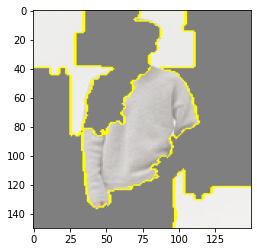

In [ ]:
from skimage.segmentation import mark_boundaries

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask)) # show how to detect our image

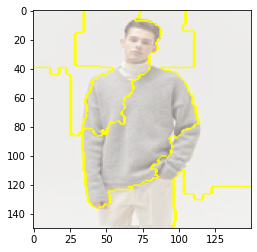

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask)) # show raw image and how to detect our image

In [ ]:
label_map = (train_generator.class_indices) #detect our label of category
print(label_map)

{'cotton': 0, 'denim': 1, 'knit': 2, 'leather': 3}


In [ ]:
explanation.top_labels[0] # We can know what the fabric is.

2

We put image & know what is Color is

In [ ]:
explainer = lime_image.LimeImageExplainer(random_state=42)

X=img_array
explanation = explainer.explain_instance(X[0], model2, hide_color=0, top_labels=5, num_samples=1000) #bring our model2 and use to detect our image

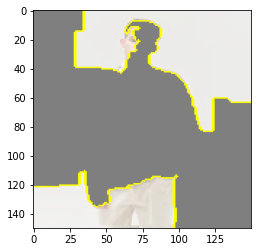

In [ ]:
from skimage.segmentation import mark_boundaries

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask)) # show how to detect our image

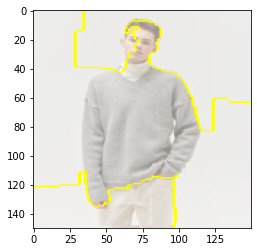

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask)) # show raw image and how to detect our image

In [ ]:
label_map = (train_color_generator.class_indices) #detect our label of category
print(label_map)

{'black': 0, 'etc': 1, 'ivory': 2}


In [ ]:
explanation.top_labels[0] # We can know what the fabric is.

0

We put image & know what is Length is

In [ ]:
explainer = lime_image.LimeImageExplainer(random_state=42)

X=img_array
explanation = explainer.explain_instance(X[0], model3, hide_color=0, top_labels=5, num_samples=1000) #bring our model3 and use to detect our image

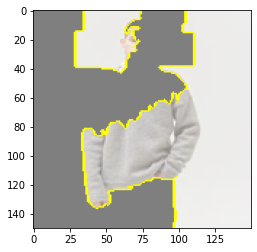

In [ ]:
from skimage.segmentation import mark_boundaries

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask)) # show how to detect our image

In [ ]:
label_map = (train_length_generator.class_indices) #detect our label of category
print(label_map)

{'half sleeve_train': 0, 'long sleeve_train': 1}


In [ ]:
explanation.top_labels[0] # We can know what the fabric is.

1